# Self Organizing Maps

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
# http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(15)
# dataset.iloc[:, 1:-1]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [4]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

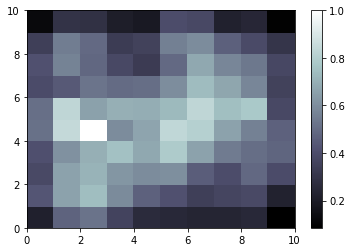

In [5]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
show()

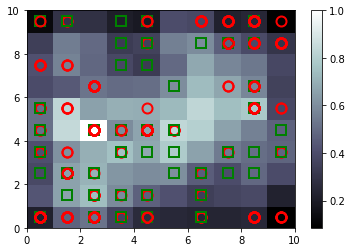

In [6]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors  = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [141]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(0,0)], mappings[(0,9)], mappings[(4,9)]), axis = 0)
frauds = sc.inverse_transform(frauds)
for client in frauds:
    print(int(client[0]))

15776156
15642934
15768295
15690772
15783859
15643056
15713983
15709252
15701885
15753550
15745804
15724851
15810485
15795690
15788224
15702149
15787229
15689786
15759133
15670646
15763194
15713160
15666012
15625311
15673747
15676156
15604130
15740411
15668889
15790113
15735330
15809909
15713250
15710138
15758477
15796413
15673238
15604196
15613673
15790689
15757467
15815443
15748432
15577515
15598802
15699963
15648876
15696287
15698749
15667588
15701081
15671582
15690898
15706602
15707681
15632669


---
# SimpSOM

Periodic Boundary Conditions active.
The weights will be initialized randomly.
The map will be trained with the online algorithm.
Training SOM... done!


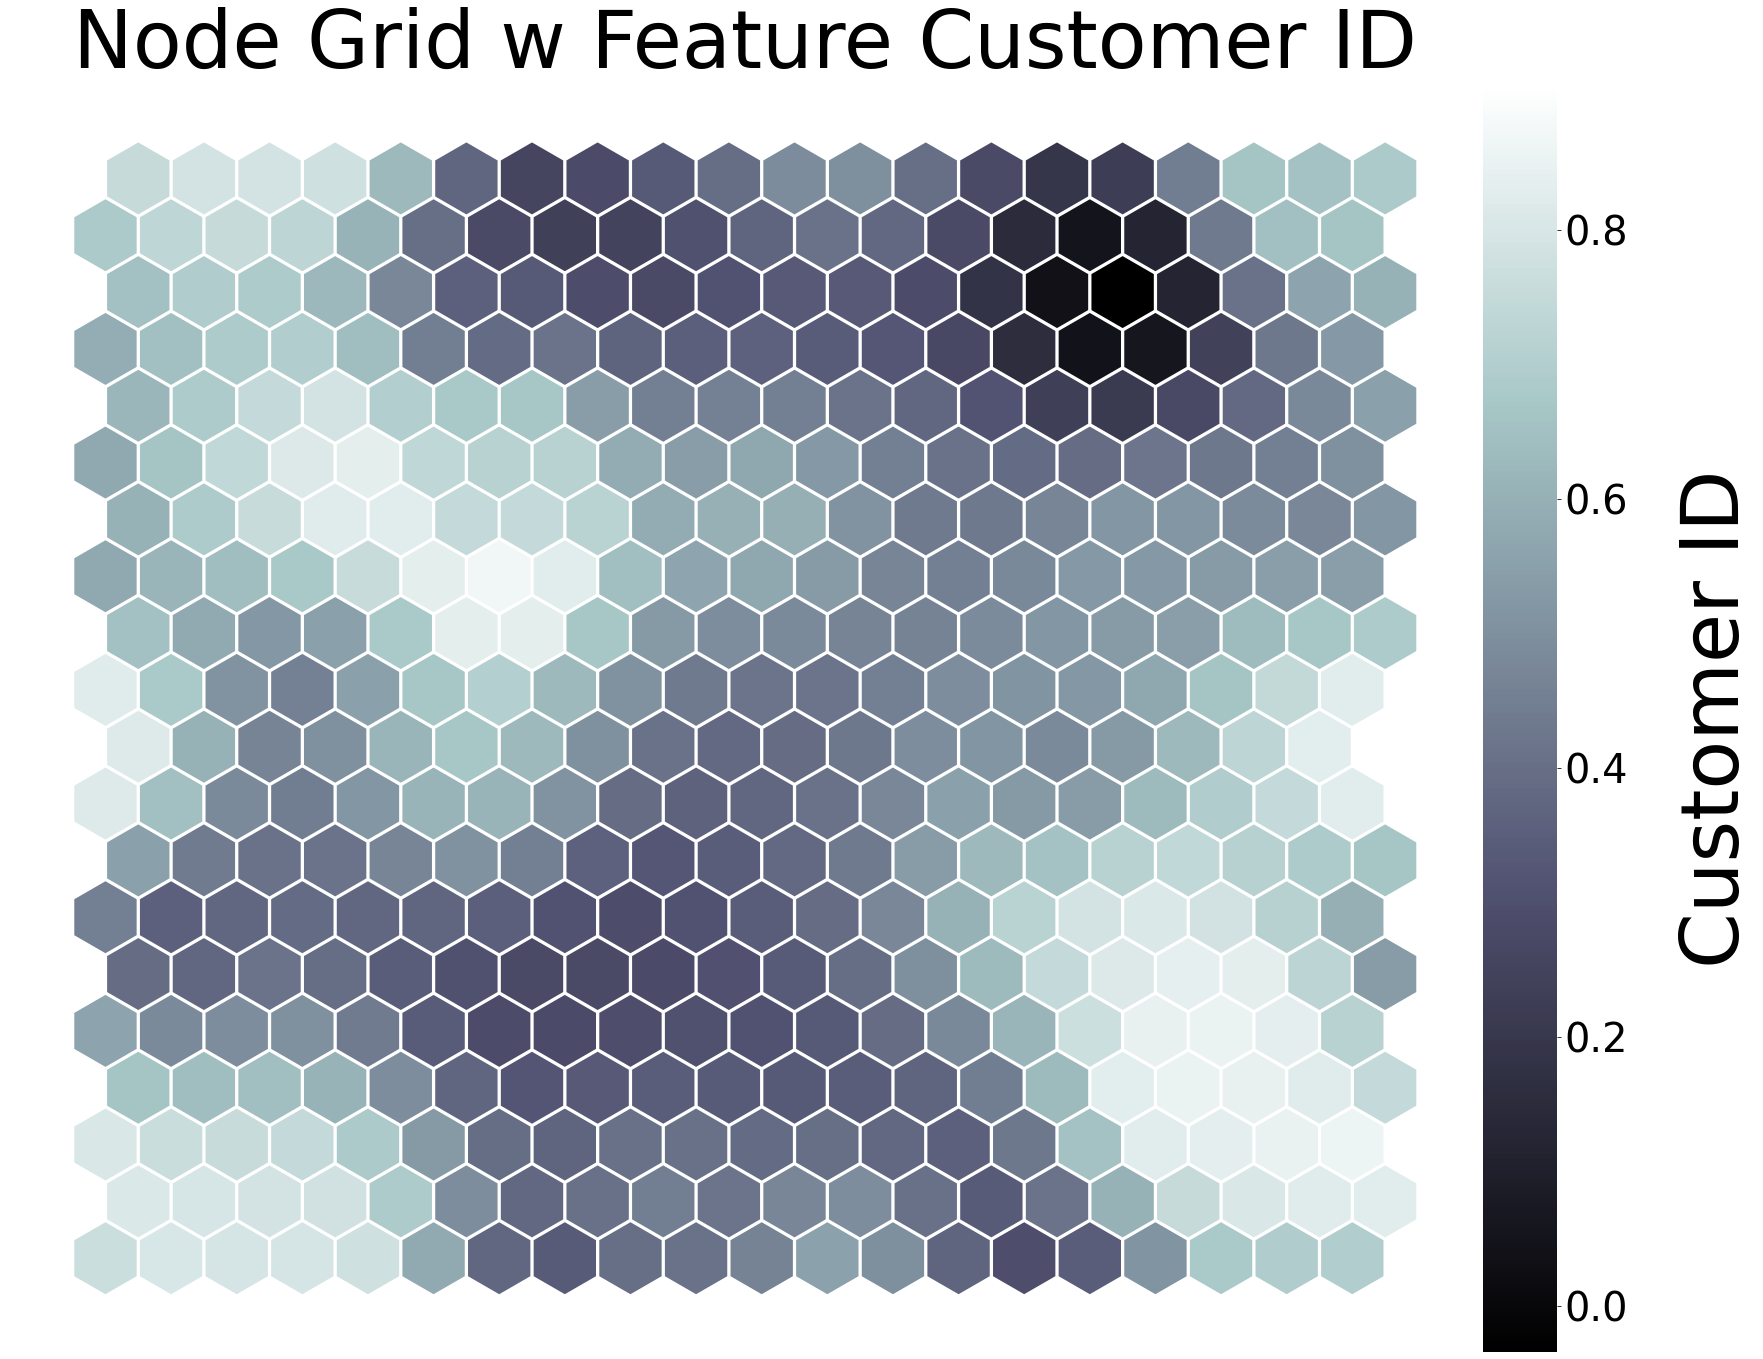

In [8]:
# ! pip install SimpSOM
import pandas as pd
import simpsom as sps
from sklearn.cluster import KMeans
import numpy as np

net = sps.SOMNet(20, 20, X, PBC=True, init='random')
net.train(train_algo='online', start_learning_rate=0.5, epochs=100)
net.save('simpsom_weights')
net.nodes_graph(colnum=0, colname='Customer ID')

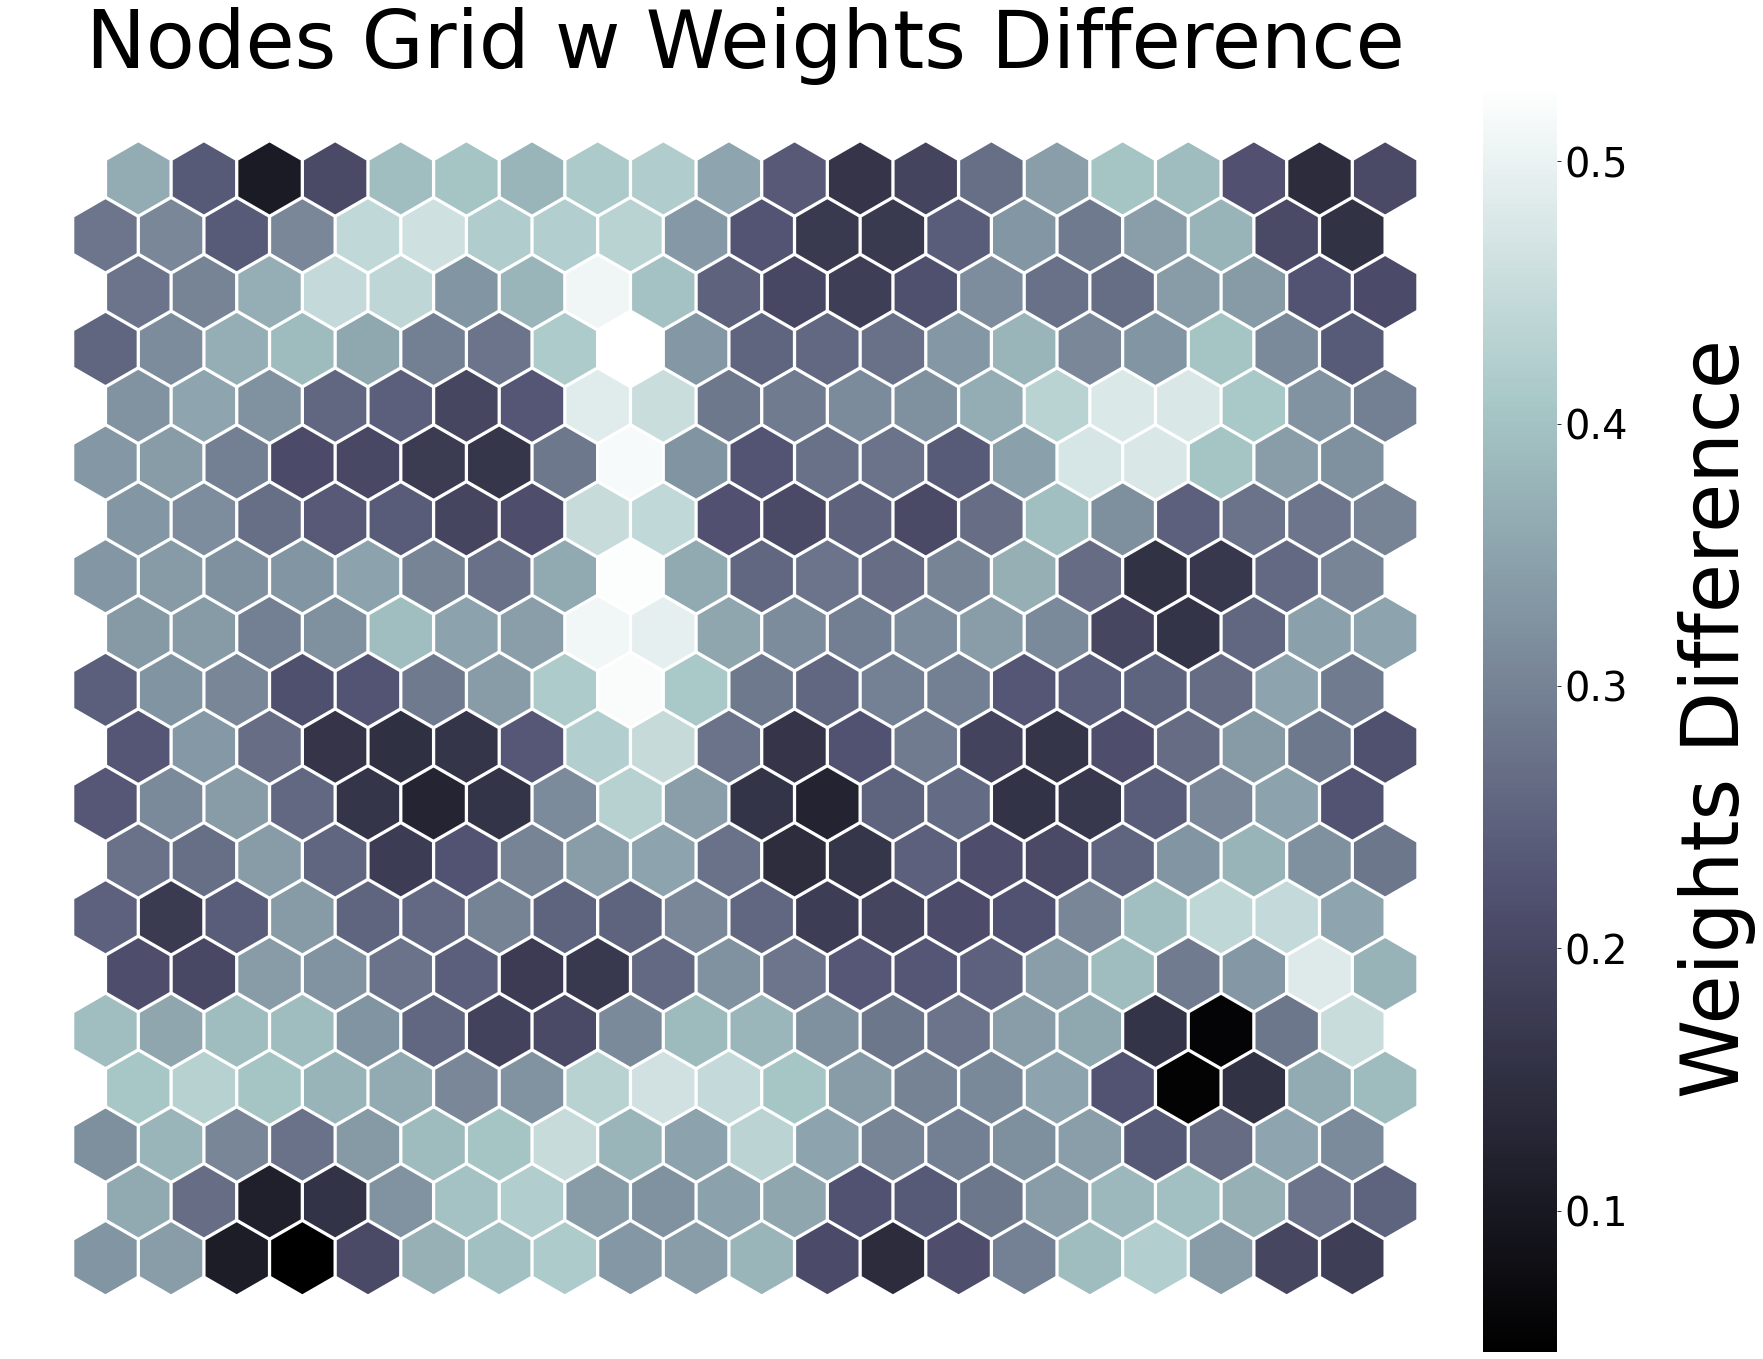

In [9]:
sps_diff = net.diff_graph(returns=True)

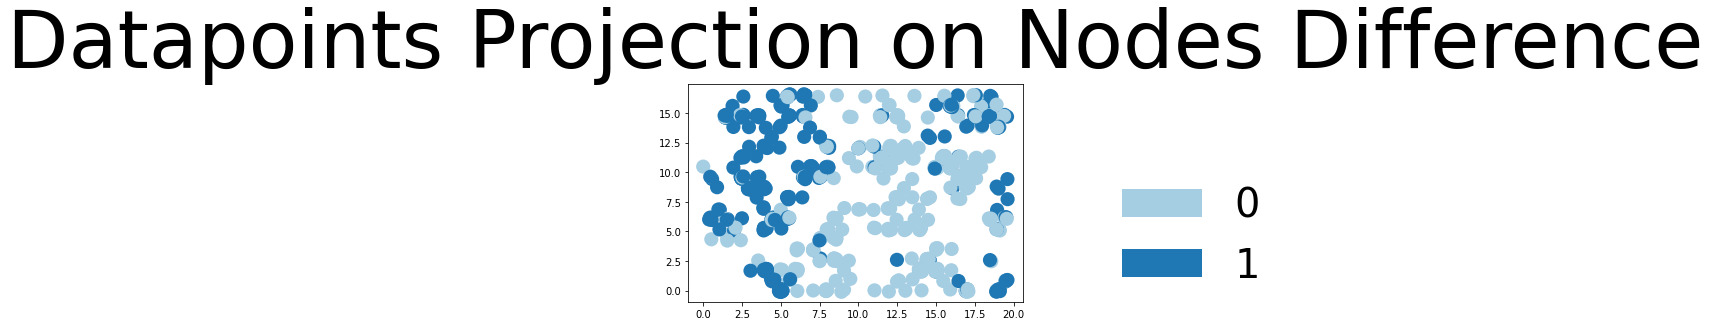

<Figure size 432x288 with 0 Axes>

In [10]:
#Project the datapoints on the new 2D network map.
sps_bmu = net.project(X, labels=y, show=True)

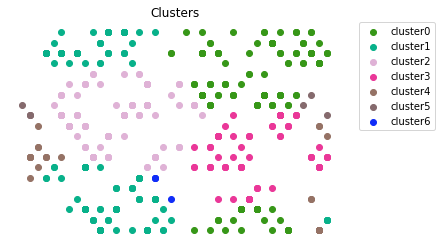

<Figure size 432x288 with 0 Axes>

In [11]:
#Cluster the datapoints according to the Quality Threshold algorithm.
sps_clusters = net.cluster(X, clus_type='qthresh', show=True)

In [85]:
nodes = net.node_list
print('length nodes: ', len(nodes))

nodes_pos_x = [i.pos[0] for i in nodes]
nodes_pos_y = [i.pos[1] for i in nodes]

#print(nodes_pos)

print('length nodes_pos_x: ', len(nodes_pos_x))
print('length nodes_pos_y: ', len(nodes_pos_y))

#for i in nodes:
#    print(i.pos)

length nodes:  400
length nodes_pos_x:  400
length nodes_pos_y:  400


In [20]:
sps_diff

[0.32788832067226953,
 0.35952182277518147,
 0.3185451148444209,
 0.40809284111796745,
 0.39327666690702223,
 0.21506350347646822,
 0.2472522079476662,
 0.2733348002982271,
 0.23282435184595096,
 0.2295906952109484,
 0.2434187045162964,
 0.33618115574454915,
 0.3306400355591793,
 0.3310085588030856,
 0.3325326532522456,
 0.3241858271581603,
 0.25544088495229433,
 0.27781248132301506,
 0.2797873669997521,
 0.3649015734452763,
 0.34201174673834567,
 0.2656350145246987,
 0.3799874505266477,
 0.4280138963808044,
 0.3550340820117981,
 0.2026503411078122,
 0.17118254867331614,
 0.2703649832107839,
 0.3116251077391008,
 0.33355158814274927,
 0.32710238167471284,
 0.3372690339960034,
 0.33766237134703747,
 0.3176074645560619,
 0.3397741090912918,
 0.3528062896553925,
 0.3159007351687004,
 0.30235854264221884,
 0.30830280063384635,
 0.23664532384691542,
 0.10940527317856065,
 0.11474844368117697,
 0.30608006991960074,
 0.40351958229055535,
 0.3905276960588304,
 0.3390307558272767,
 0.2416862993

In [21]:
sps_bmu

[[15.0, 1.7320508075688776],
 [11.5, 11.258330249197702],
 [12.5, 0.8660254037844388],
 [6.5, 16.454482671904337],
 [4.0, 6.9282032302755105],
 [6.5, 14.722431864335457],
 [15.5, 11.258330249197702],
 [5.5, 14.722431864335457],
 [13.0, 8.660254037844387],
 [6.5, 16.454482671904337],
 [5.0, 0.0],
 [5.0, 0.0],
 [5.0, 0.0],
 [2.5, 14.722431864335457],
 [14.0, 1.7320508075688776],
 [15.5, 11.258330249197702],
 [4.0, 1.7320508075688776],
 [6.5, 9.526279441628825],
 [13.0, 5.196152422706632],
 [6.5, 9.526279441628825],
 [11.5, 11.258330249197702],
 [15.5, 16.454482671904337],
 [15.5, 11.258330249197702],
 [18.5, 6.062177826491071],
 [15.5, 11.258330249197702],
 [5.0, 0.0],
 [13.0, 5.196152422706632],
 [5.0, 0.0],
 [6.5, 9.526279441628825],
 [5.0, 0.0],
 [5.0, 0.0],
 [9.5, 14.722431864335457],
 [18.0, 13.856406460551021],
 [5.0, 0.0],
 [5.0, 1.7320508075688776],
 [9.0, 6.9282032302755105],
 [17.0, 0.0],
 [1.5, 14.722431864335457],
 [3.5, 14.722431864335457],
 [5.0, 15.588457268119896],
 [0.5,

In [22]:
sps_clusters

[[0,
  1,
  2,
  6,
  14,
  15,
  20,
  21,
  22,
  24,
  31,
  32,
  36,
  41,
  50,
  57,
  58,
  60,
  63,
  66,
  67,
  70,
  82,
  83,
  84,
  85,
  86,
  88,
  90,
  91,
  92,
  96,
  100,
  101,
  105,
  107,
  108,
  109,
  111,
  114,
  121,
  122,
  127,
  135,
  140,
  141,
  142,
  147,
  148,
  151,
  152,
  155,
  157,
  159,
  161,
  166,
  168,
  176,
  177,
  179,
  183,
  184,
  186,
  187,
  188,
  190,
  192,
  193,
  201,
  202,
  203,
  209,
  214,
  216,
  217,
  218,
  221,
  232,
  236,
  237,
  238,
  249,
  250,
  251,
  257,
  258,
  259,
  262,
  263,
  268,
  269,
  270,
  272,
  275,
  276,
  280,
  283,
  289,
  290,
  294,
  301,
  302,
  303,
  306,
  311,
  314,
  315,
  316,
  318,
  326,
  327,
  328,
  329,
  334,
  340,
  341,
  344,
  348,
  351,
  354,
  356,
  364,
  365,
  374,
  377,
  378,
  381,
  386,
  390,
  391,
  394,
  395,
  397,
  400,
  401,
  409,
  411,
  415,
  418,
  427,
  428,
  436,
  439,
  441,
  448,
  449,
  451,
  454,


In [115]:
g = []
gi = []
# [nodes_pos_x[i], nodes_pos_y[i], i, bmui, y[bmui]]
gc = []

# find nodes by their differences
for i, e in enumerate(sps_diff):
    if e > 0.5:
        g.append(e)
        gi.append(i)
        for bmui, bmu in enumerate(sps_bmu):
            if bmu == [nodes_pos_x[i], nodes_pos_y[i]] and [nodes_pos_x[i], nodes_pos_y[i], i, bmui, y[bmui]] not in gc:
                gc.append([nodes_pos_x[i], nodes_pos_y[i], i, bmui, y[bmui]])

print(len(g), g)
print(len(gi), gi)
print(len(gc), gc)

6 [0.5100428694600683, 0.5079480591395367, 0.520482206988158, 0.5238151385509989, 0.5171245527758233, 0.5290928857864128]
6 [151, 157, 170, 172, 174, 176]
20 [[7.5, 9.526279441628825, 151, 234, 1], [7.5, 9.526279441628825, 151, 412, 1], [7.5, 9.526279441628825, 151, 628, 0], [8.0, 10.392304845413264, 172, 128, 1], [8.0, 10.392304845413264, 172, 144, 0], [8.0, 10.392304845413264, 172, 170, 0], [8.0, 10.392304845413264, 172, 207, 0], [8.0, 10.392304845413264, 172, 370, 1], [8.0, 10.392304845413264, 172, 419, 1], [8.0, 10.392304845413264, 172, 493, 0], [8.0, 10.392304845413264, 172, 632, 1], [8.0, 10.392304845413264, 172, 682, 1], [8.0, 12.124355652982143, 174, 64, 1], [8.0, 12.124355652982143, 174, 71, 0], [8.0, 12.124355652982143, 174, 240, 1], [8.0, 12.124355652982143, 174, 254, 1], [8.0, 12.124355652982143, 174, 338, 1], [8.0, 12.124355652982143, 174, 350, 1], [8.0, 12.124355652982143, 174, 414, 1], [8.0, 12.124355652982143, 174, 416, 0]]


In [133]:
# find the answers for the similar clients
answers = {}
for x in gc:
    if (x[0], x[1]) in answers:
        answers[(x[0], x[1])].append([x[3], x[4]])
    else:
        answers[(x[0], x[1])] = []

print('answers', answers)        
        
filtered_answers = {}
# find if people have different outcomes
for k in answers.keys():
    # get the outcomes f
    v = [x[1] for x in answers[k]]
    print(v)
    diff = v.count(v[0]) != len(v)
    if (diff):
        filtered_answers[k] = answers[k]

filtered_answers

answers {(7.5, 9.526279441628825): [[412, 1], [628, 0]], (8.0, 10.392304845413264): [[144, 0], [170, 0], [207, 0], [370, 1], [419, 1], [493, 0], [632, 1], [682, 1]], (8.0, 12.124355652982143): [[71, 0], [240, 1], [254, 1], [338, 1], [350, 1], [414, 1], [416, 0]]}
[1, 0]
[0, 0, 0, 1, 1, 0, 1, 1]
[0, 1, 1, 1, 1, 1, 0]


{(7.5, 9.526279441628825): [[412, 1], [628, 0]],
 (8.0, 10.392304845413264): [[144, 0],
  [170, 0],
  [207, 0],
  [370, 1],
  [419, 1],
  [493, 0],
  [632, 1],
  [682, 1]],
 (8.0, 12.124355652982143): [[71, 0],
  [240, 1],
  [254, 1],
  [338, 1],
  [350, 1],
  [414, 1],
  [416, 0]]}

In [140]:
# get the possible frauds
frauds = []
for k in filtered_answers.keys():
    for v in filtered_answers[k]:
        frauds.append(X[v[0]]) 

frauds = sc.inverse_transform(frauds)

for f in frauds:
    print(int(f[0]))

15698749
15667588
15761158
15684722
15770995
15757188
15647191
15776545
15793896
15633608
15608595
15772329
15734649
15646082
15717629
15604536
15635598
